In [1]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


In [3]:
import spectools_ir
spectools_ir.__file__

'/Users/erichegonzales/opt/anaconda3/lib/python3.8/site-packages/spectools_ir/__init__.py'

In [59]:
hitran_data=extract_hitran_data('CO',4.58,5.2,vup=1)  #Outputs an astropy table
#Read in FITS data containing spectrum.
infile='nirspec_citau_glue.dat'  #my file name
wave,flux = np.loadtxt(infile, unpack=True, skiprows=21)

infile2='nirspec_lkha330_glue.dat'  #my file name
wave2,flux2 = np.loadtxt(infile2, unpack=True, skiprows=30)

infile3='nirspec_twhya_glue.dat'  #my file name
wave3,flux3 = np.loadtxt(infile3, unpack=True, skiprows=46)

infile4='nirspec_doar44_glue.dat'  #my file name
wave4,flux4 = np.loadtxt(infile4, unpack=True, skiprows=29)

infile5='nirspec_hd135344_glue.dat'  #my file name
wave5,flux5 = np.loadtxt(infile5, unpack=True, skiprows=29)

infile6='nirspec_uxtau_glue.dat'  #my file name
wave6,flux6 = np.loadtxt(infile6, unpack=True, skiprows=29)

infile7='nirspec_dmtau_cvsglue.dat'  #my file name
wave7,flux7 = np.loadtxt(infile7, unpack=True, skiprows=29)

Text(0, 0.5, 'Flux [Jy]')

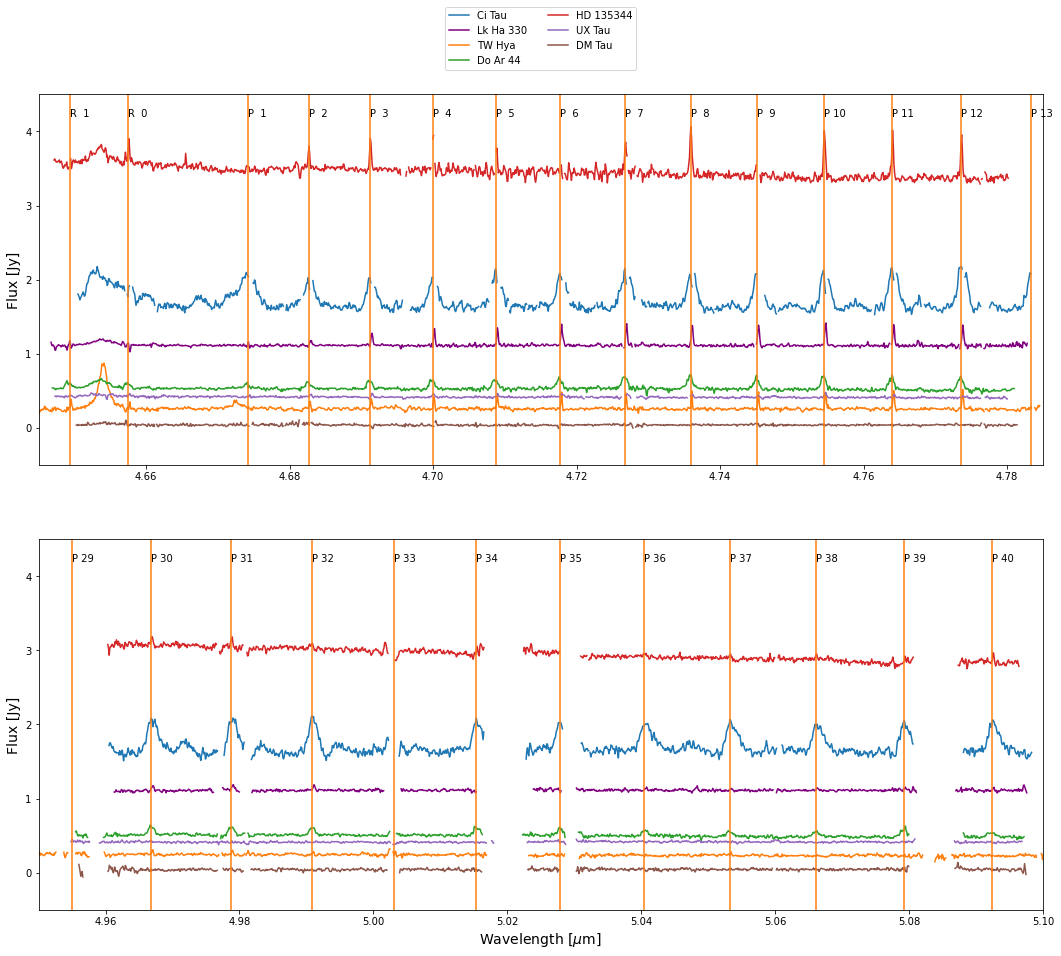

In [89]:
#Plot spectrum.
fig=plt.figure(figsize=(18,15))

ax1=fig.add_subplot(211)
ax1.plot(wave,flux, label='Ci Tau')
ax1.plot(wave2,flux2, color='purple', label='Lk Ha 330')
ax1.plot(wave3,flux3, label='TW Hya')
ax1.plot(wave4,flux4, label='Do Ar 44')
ax1.plot(wave5,flux5, label='HD 135344')
ax1.plot(wave6,flux6, label='UX Tau')
ax1.plot(wave7,flux7, label='DM Tau')
ax1.set_xlim(4.645,4.785)
ax1.set_ylim(-0.5,4.5)
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.645) & (mywave<4.785) ):
        ax1.axvline(mywave,color='C1')
        ax1.text(hitran_data['wave'][i],4.2,hitran_data['Qpp'][i].strip())
ax1.set_ylabel('Flux [Jy]',fontsize=14)
matplotlib.pyplot.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2)

ax2=fig.add_subplot(212)
ax2.plot(wave,flux)
ax2.plot(wave2,flux2, color='purple')
ax2.plot(wave3,flux3)
ax2.plot(wave4,flux4)
ax2.plot(wave5,flux5)
ax2.plot(wave6,flux6)
ax2.plot(wave7,flux7)
ax2.set_xlim(4.95,5.10)
ax2.set_ylim(-0.5,4.5)
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.95) & (mywave<5.10) ):
        ax2.axvline(mywave,color='C1')
        ax2.text(hitran_data['wave'][i],4.2,hitran_data['Qpp'][i].strip())
ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=14)
ax2.set_ylabel('Flux [Jy]',fontsize=14)

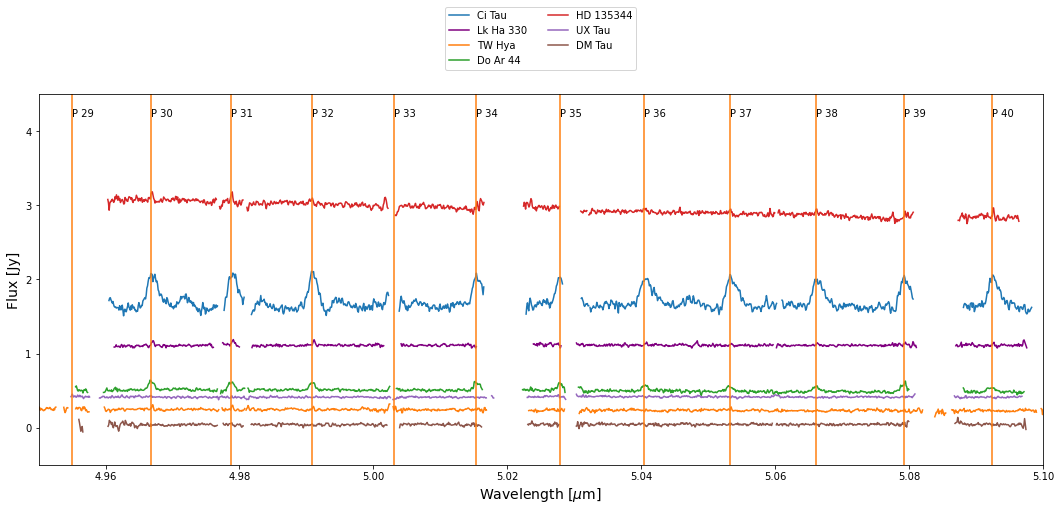

In [90]:
fig=plt.figure(figsize=(18,15))

ax2=fig.add_subplot(212)
ax2.plot(wave,flux, label='Ci Tau')
ax2.plot(wave2,flux2, color='purple', label='Lk Ha 330')
ax2.plot(wave3,flux3, label='TW Hya')
ax2.plot(wave4,flux4, label='Do Ar 44')
ax2.plot(wave5,flux5, label='HD 135344')
ax2.plot(wave6,flux6, label='UX Tau')
ax2.plot(wave7,flux7, label='DM Tau')
ax2.set_xlim(4.95,5.10)
ax2.set_ylim(-0.5,4.5)
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.95) & (mywave<5.10) ):
        ax2.axvline(mywave,color='C1')
        ax2.text(hitran_data['wave'][i],4.2,hitran_data['Qpp'][i].strip())
ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=14)
ax2.set_ylabel('Flux [Jy]',fontsize=14)
matplotlib.pyplot.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2)